In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

power_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_tennis_power_parquet"):
    single_stats = pd.read_parquet("raw/raw_tennis_power_parquet/" + file)
    power_dataframe = pd.concat([power_dataframe, single_stats], axis= 'rows', ignore_index=True)

power_dataframe.head(10)



,match_id,set_num,game_num,value,break_occurred
0,11674074,1,1,30.50,False
1,11674074,1,2,81.10,True
2,11674074,1,3,51.60,False
3,11674074,1,4,-33.80,False
4,11674074,1,5,-59.88,True
5,11674074,1,6,-22.68,False
6,11674074,1,7,10.00,False
7,11674074,1,8,-10.00,False
8,11674074,1,9,54.90,False
9,11674074,1,10,-10.00,False


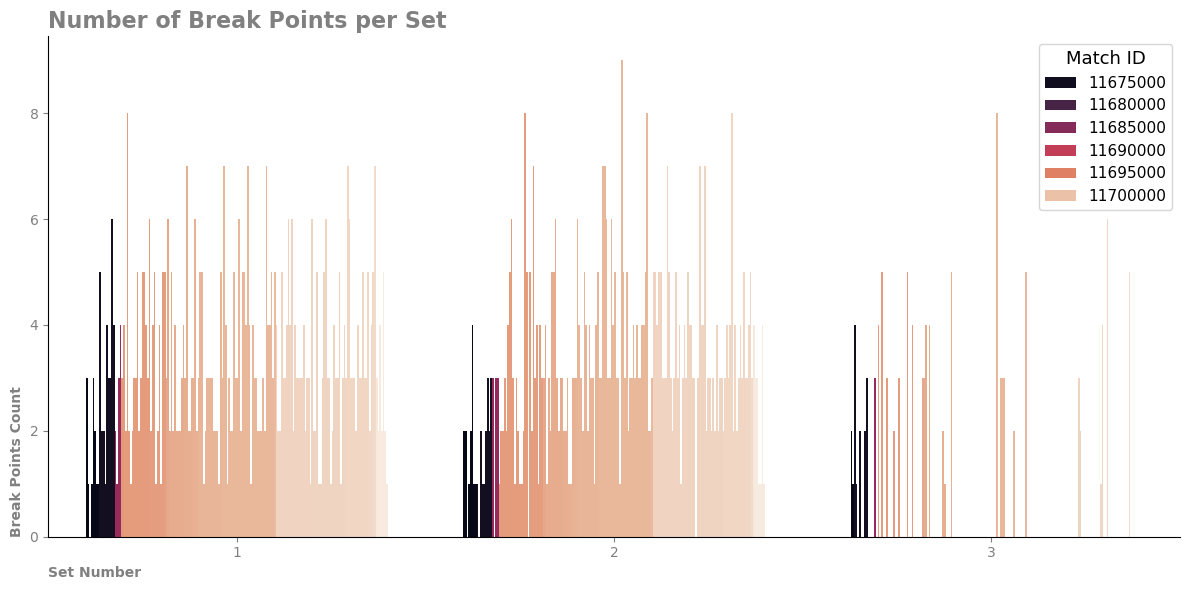

In [19]:

# شمارش تعداد نقاط شکسته
break_points_summary = power_dataframe.groupby(['match_id', 'set_num'])['break_occurred'].sum().reset_index()

# رسم نمودار
plt.figure(figsize=(12, 6))
sns.barplot(data=break_points_summary, x='set_num', y='break_occurred', hue='match_id', palette='rocket')

plt.title('Number of Break Points per Set', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Set Number', fontsize=10, color='gray', loc='left', fontweight='bold')
plt.ylabel('Break Points Count', fontsize=10, color='gray', loc='bottom', fontweight='bold')
plt.xticks(rotation=0)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(colors='gray')

plt.legend(title='Match ID', title_fontsize='13', fontsize='11', loc='upper right')
plt.tight_layout()
plt.show()


This chart, which shows the relationship between total points and the number of break points, reveals some interesting insights:

1. **Distribution of Points and Break Points**: It seems that many data points are concentrated in the central part of the chart, particularly around the average values (approximately 0 for total points and 3-4 for break points). This indicates that most matches have an average number of points and break points.

2. **Variation Based on Match ID**: The chart includes points of different colors representing various Match IDs. Despite the variations in points and break points, the colors (and indirectly the Match IDs) do not seem to create any specific pattern in the data. This suggests there is no clear relationship between different Match IDs and break point performance.

3. **Linear Regression**: The regression line added to the chart is visibly flat, with a very slight slope. This means there is no strong direct relationship between total points and the number of break points, or the relationship is very weak. It can be concluded that an increase or decrease in total points does not have a significant impact on the number of break points in each set.

4. **Further Analysis Based on Horizontal and Vertical Distribution**: On the vertical axis (Total Break Points), we see that break points typically vary between 2 and 4, while on the horizontal axis (Total Points), the data is more dispersed. This dispersion shows that even in matches with a high number of points, there are not necessarily more break points.

Overall, this chart suggests that there is no meaningful relationship between the total number of points and the number of break points. For a more thorough investigation, deeper analysis might be needed, such as considering other relevant factors or analyzing the data based on court type or specific players.

In [3]:
break_points_summary

,match_id,set_num,break_occurred
0,11674074,1,3
1,11674074,2,2
2,11674103,1,1
3,11674103,2,2
4,11674105,1,0
...,...,...,...
384,11703470,2,1
385,11703524,1,2
386,11703524,2,4
387,11703525,1,1


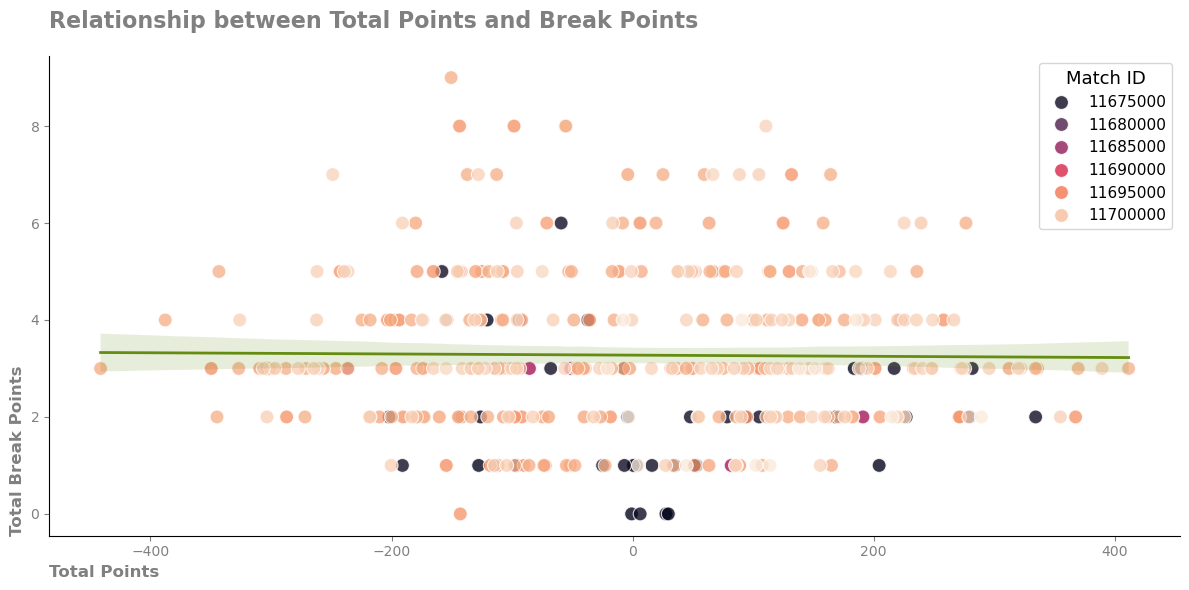

In [29]:


# 1. جمع‌آوری داده‌ها: محاسبه مجموع امتیازات و تعداد نقاط شکسته برای هر match_id و set_num
# فرض بر این است که امتیازات در power_dataframe با نام 'value' و نقاط شکسته در power_dataframe با نام 'break_occurred' ذخیره شده‌اند.

# جمع‌آوری داده‌ها از power_dataframe
power_summary = power_dataframe.groupby(['match_id', 'set_num']).agg(
    total_points=('value', 'sum'),
    total_breaks=('break_occurred', 'sum')
).reset_index()

# 2. تحلیل ارتباط: با استفاده از scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=power_summary, x='total_points', y='total_breaks', hue='match_id', palette='rocket', s=100, alpha = 0.8)

# افزودن خطوط رگرسیون
sns.regplot(data=power_summary, x='total_points', y='total_breaks', scatter=False, color='#648c11', line_kws={"linewidth": 2})

# تنظیمات نمودار
plt.title('Relationship between Total Points and Break Points', fontsize=16, pad=20, color='gray', fontweight='bold', loc='left')
plt.xlabel('Total Points', fontsize=12, color='gray', loc='left', fontweight='bold')
plt.ylabel('Total Break Points',  fontsize=12, color='gray', loc='bottom', fontweight='bold')
plt.xticks(rotation=0)

plt.tick_params(colors='gray')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.legend(title='Match ID', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()


The chart you provided displays the number of break points for each set, color-coded based on different Match IDs. Here are several key points for analyzing this chart:

### 1. **Fluctuations in Break Points Between Sets**:
   The chart shows that in most matches, the number of break points varies between sets. For example:
   - **Set 1**: In some matches, the number of break points is relatively low (around 2 to 4), while in others, it increases up to 8. Overall, there are significant fluctuations in the number of break points between matches.
   - **Set 2**: This set follows a similar pattern to Set 1, though the number of break points appears to be slightly lower compared to the first set.
   - **Set 3**: The number of break points seems to decrease in this set, and in some matches, very few break points are recorded.

### 2. **Color Coding by Match ID**:
   Different Match IDs are represented by various colors, allowing us to analyze which Match IDs had more break points in each set. Generally, lighter colors (such as yellow) indicate matches with a higher number of break points.

### 3. **Break Point Distribution Across Matches**:
   The chart effectively demonstrates that the number of break points varies between sets and isn’t consistently related to specific matches. In some matches, the break points are more evenly distributed across sets, while in others, there are large differences between the sets.

### 4. **Overall Pattern**:
   It seems that in most matches, the number of break points is higher in the earlier sets (Sets 1 and 2), and gradually decreases in Set 3. This may be related to player fatigue or changes in strategy over the course of the match.

### 5. **Match ID-Based Analysis**:
   For certain Match IDs, such as 11675000 (dark blue), the number of break points in Sets 1 and 2 is relatively low, while for other Match IDs (such as 11700000), more break points are recorded in different sets.

### Conclusion:
This chart shows that the number of break points fluctuates significantly across sets, and there is no consistent pattern between matches. Additionally, it appears that some Match IDs had significantly more break points in specific sets.

In [5]:
power_summary

,match_id,set_num,total_points,total_breaks
0,11674074,1,183.80,3
1,11674074,2,279.50,2
2,11674103,1,53.08,1
3,11674103,2,168.54,2
4,11674105,1,27.62,0
...,...,...,...,...
384,11703470,2,113.92,1
385,11703524,1,214.98,2
386,11703524,2,90.66,4
387,11703525,1,4.80,1


In [6]:
power_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match_id      389 non-null    int64  
 1   set_num       389 non-null    int64  
 2   total_points  389 non-null    float64
 3   total_breaks  389 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.3 KB
